In [420]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [777]:
df

,Unnamed: 0,doc,line,created_utc,subreddit,link_id,Paris,London,Madrid,Berlin,...,Porto,Sevilla_merged,Dublin,Helsinki,Amsterdam,Rotterdam,Düsseldorf,tops,top_string,num_tops
0,0,2006-02,2,1139003115,reddit.com,t3_18gy,0,0,0,0,...,0,0,0,0,0,0,0,"[Athens_merged, Roma_merged]","['Athens_merged', 'Roma_merged']",2
1,1,2006-02,8,1139517217,reddit.com,t3_1dp6,1,0,0,0,...,0,0,0,0,0,0,0,"[Barcelona, Paris]","['Barcelona', 'Paris']",2
2,2,2006-03,18,1143810425,reddit.com,t3_3qiz,0,1,0,0,...,0,0,0,0,0,0,0,"[Birmingham, London]","['Birmingham', 'London']",2
3,3,2006-04,46,1146234649,reddit.com,t3_5y81a,1,0,0,0,...,0,0,0,0,0,0,0,"[Barcelona, Paris]","['Barcelona', 'Paris']",2
4,4,2006-04,45,1146212582,reddit.com,t3_5y81a,1,0,0,0,...,0,0,0,0,0,0,0,"[Barcelona, Paris]","['Barcelona', 'Paris']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121432,1121432,2021-01,99683,1610392288,soccer,t3_kv93he,0,0,1,0,...,0,0,0,0,0,0,0,"[Barcelona, Madrid]","['Barcelona', 'Madrid']",2
1121433,1121433,2021-01,99660,1610392097,sportsbook,t3_kuo5ji,0,0,1,0,...,0,0,0,0,0,0,0,"[Lisboa_merged, Madrid]","['Lisboa_merged', 'Madrid']",2
1121434,1121434,2021-01,99653,1610392033,reddevils,t3_kv5k8w,0,1,0,0,...,0,0,0,0,0,0,0,"[London, Manchester]","['London', 'Manchester']",2
1121435,1121435,2021-01,99701,1610392390,europe,t3_kv9m63,0,0,0,0,...,0,0,0,0,0,0,0,"[Athens_merged, Lisboa_merged]","['Athens_merged', 'Lisboa_merged']",2


In [84]:
df = pd.read_csv('cooccurrence_df.csv')
city_variation_df = pd.read_csv('city_variations.csv')
city_variation_df = city_variation_df[:39]
#filter dataframe - remove extra columns (only top 39 cities with populations over 1million)
cols1 = ['doc', 'line', 'created_utc', ' subreddit', ' link_id']
cols2 = list(city_variation_df['col'])
cols = cols1 + cols2
df = df[cols]
#remove the rows with no co-occurrences when extra cities are gone
df['occ_sum'] = df[cols2].sum(axis = 1)
df = df[df['occ_sum']>1]
df = df[cols]

C:\Users\kodri\AppData\Local\Temp\ipykernel_37580\1562947877.py:1: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cooccurrence_df.csv')
C:\Users\kodri\AppData\Local\Temp\ipykernel_37580\1562947877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occ_sum'] = df[cols2].sum(axis = 1)


## 1. Gravity Model

#### 1.1 Convert dummies to a list of toponyms for each comment.

In [109]:
df['tops'] = df['tops'].apply(lambda x: x.replace('[','').replace(']','').replace('\'','').replace(' ','').split(','))
for idx, row in df.iterrows():
    df['tops'].loc[idx].sort()
df['top_string'] = df['tops'].apply(lambda x: str(x))
df['num_tops'] = df['tops'].apply(lambda x: len(x))

In [115]:
total = len(df[df['num_tops']>2]['top_string'].value_counts().keys())
tops = []
subs = []
counter = 0
tracker = 0
for i in df[df['num_tops']>2]['top_string'].value_counts().keys():
    tracker+=1
    counter+=1
    temp_df = df[df['top_string']==i]
    for j in combinations(temp_df['tops'].iloc[0], 2):
        for k, row in temp_df.iterrows():
            tops.append(j)
            subs.append(row[' subreddit'])
    if tracker>300:
        tracker = 0
        print(str(100*counter//total)+'% done')

1% done
2% done
3% done
4% done
5% done
6% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
96% done
97% done
98% done
99% done


#### 1.2 expand rows with more than two toponyms so there is one row per unique combination of 2

In [161]:
#add the rows from the combinations to the bottom of the dataframe
new_rows = pd.DataFrame()
new_rows['tops'] = tops 
new_rows[' subreddit'] = subs
top_string = []
for idx, row in new_rows.iterrows():
    a = list(row['tops'])
    a.sort()
    top_string.append(str(a))
a['top_string'] = top_string

#combinate dataframes
model_df = pd.concat([new_rows[['top_string', ' subreddit']], df[df['num_tops']==2][['top_string', ' subreddit']]])
model_df.reset_index(inplace=True)

#### 1.3 add distance and city information

In [ ]:
pop_df = pd.read_csv('city_variations.csv')
dist_df = pd.read_csv(r"C:\Users\kodri\Desktop\CITYNET Europe\data\distance_matrix.csv")

In [182]:
model_df['tops'] = model_df['top_string'].apply(lambda x: x.replace('[','').replace(']','').replace('\'','').replace('_merged','').replace(' ','').split(','))
model_df['top1'] = model_df['tops'].apply(lambda x: x[0])
model_df['top2'] = model_df['tops'].apply(lambda x: x[1])
#change to english place names
mapping = {'Roma':'Rome', 'Lisboa':'Lisbon', 'Bucuresti':'Bucharest', "Torino":'Turin'}

In [234]:
#change to english place names
mapping = {'Sevilla':'Seville','Roma':'Rome', 'Lisboa':'Lisbon', 'Bucuresti':'Bucharest', "Torino":'Turin'}
model_df = model_df.replace({"top1": mapping})
model_df = model_df.replace({"top2": mapping})

In [235]:
mapping = {}
for i, row in pop_df.iterrows():
    mapping[row['eng']] = row['pop']

model_df['pop1'] = model_df['top1']
model_df = model_df.replace({"pop1": mapping})
model_df['pop2'] = model_df['top2']
model_df = model_df.replace({"pop2": mapping})

In [236]:
model_df['top_string2'] = model_df['top1']+model_df['top2']
model_df['distance'] = model_df['top_string2']
mapping = {}
dist_df['top_string2'] = dist_df['InputID']+dist_df['TargetID']
for i, row in dist_df.iterrows():
    mapping[row['top_string2']] = row['Distance']

model_df = model_df.replace({"distance": mapping})

In [221]:
model_df.drop(['index', 'top_string'], inplace=True, axis = 1)

#### 1.4 transform pop/dist

In [682]:
model_df['ln_pop1'] = model_df['pop1'].apply(lambda x: math.log(x))
model_df['ln_pop2'] = model_df['pop2'].apply(lambda x: math.log(x))
model_df['ln_distance'] = model_df['distance'].apply(lambda x: math.log(x))

#### 1.5 Regression

In [683]:
model_df['count'] = 1
cols = ['top_string2','ln_distance','ln_pop1', 'ln_pop2', 'count']
X = model_df[cols[:-1]].groupby('top_string2').mean()
Y = model_df[[cols[-1], 'top_string2']].groupby('top_string2').sum()
Y['ln_count'] = Y['count'].apply(lambda x: math.log(x))
Y = Y['ln_count']

In [684]:
model_df

,Unnamed: 0,subreddit,tops,top1,top2,pop1,pop2,top_string2,distance,ln_pop1,ln_pop2,ln_distance,counts,count
0,0,reddit.com,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405,1,1
1,1,reddit.com,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405,1,1
2,2,it,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405,1,1
3,3,AskReddit,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405,1,1
4,4,AskReddit,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128596,2128596,soccer,"['Barcelona', 'Madrid']",Barcelona,Madrid,3659,4955,BarcelonaMadrid,5.069220e+05,8.204945,8.508152,13.136112,1,1
2128597,2128597,sportsbook,"['Lisboa', 'Madrid']",Lisbon,Madrid,2315,4955,LisbonMadrid,5.038610e+05,7.747165,8.508152,13.130056,1,1
2128598,2128598,reddevils,"['London', 'Manchester']",London,Manchester,8256,2207,LondonManchester,2.623567e+05,9.018695,7.699389,12.477460,1,1
2128599,2128599,europe,"['Athens', 'Lisboa']",Athens,Lisbon,3331,2315,AthensLisbon,2.858622e+06,8.111028,7.747165,14.865850,1,1


In [685]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_count   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.16e-62
Time:                        18:27:09   Log-Likelihood:                -1222.7
No. Observations:                 703   AIC:                             2453.
Df Residuals:                     699   BIC:                             2472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2772      1.424      1.599      

In [531]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_count   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           6.04e-72
Time:                        14:26:49   Log-Likelihood:                -1198.5
No. Observations:                 703   AIC:                             2407.
Df Residuals:                     698   BIC:                             2430.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7077      1.379      1.238      

#### 1.6 Results and Outlier Detection

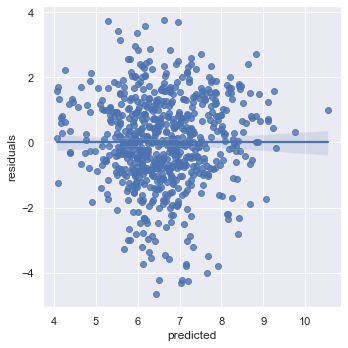

In [701]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["residuals"] = model.resid.values
performance["ln_distance"] = list(X['ln_distance'])
performance["predicted"] = list(model.fittedvalues)

sns.lmplot(x = "predicted", y = "residuals", data = performance)

Text(0, 0.5, 'studentized residuals')

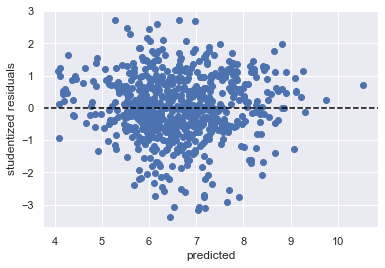

In [702]:
stud_res = sm.regression.linear_model.OLSResults.outlier_test(model)

#define predictor variable values and studentized residuals
x = Y
y = stud_res['student_resid']

#create scatterplot of predictor variable vs. studentized residuals
plt.scatter(list(model.fittedvalues), y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('predicted')
plt.ylabel('studentized residuals') 

#### Identify and remove outliers

In [705]:
results_df

,const,ln_pop1,ln_pop2,ln_distance,r_soccer_norm,student_resid,unadj_p,bonf(p),ln_count
AmsterdamAthens,1.0,6.958448,8.111028,14.588456,0.015499,0.821602,0.411584,1.0,7.302496
AmsterdamBarcelona,1.0,6.958448,8.204945,14.029741,0.033509,1.544551,0.122908,1.0,8.803124
AmsterdamBerlin,1.0,6.958448,8.236421,13.266508,0.006700,1.749641,0.080620,1.0,9.678530
AmsterdamBirmingham,1.0,6.958448,7.767687,13.043953,0.024779,-0.457884,0.647178,1.0,6.336826
AmsterdamBrussels,1.0,6.958448,7.311886,12.066258,0.008364,1.416565,0.157056,1.0,9.178230
...,...,...,...,...,...,...,...,...,...
TurinVienna,1.0,7.177019,7.422971,13.528876,0.077586,-0.742078,0.458290,1.0,5.446737
TurinWarsaw,1.0,7.177019,7.602900,14.047376,0.236842,-1.404805,0.160524,1.0,4.330733
ValenciaVienna,1.0,7.183871,7.422971,14.319053,0.212465,-0.019687,0.984299,1.0,5.866468
ValenciaWarsaw,1.0,7.183871,7.602900,14.589943,0.184783,-0.980054,0.327399,1.0,4.521789


In [510]:
#identify outliers
results_df = pd.concat([X, stud_res, Y], axis = 1)
results_df[results_df['student_resid']<-3]

,const,ln_pop1,ln_pop2,ln_distance,r_soccer_norm,student_resid,unadj_p,bonf(p),ln_count
AthensKatowice,1.0,8.111028,7.731492,14.158947,0.052632,-3.099772,0.002015,1.000000,2.944439
DüsseldorfKatowice,1.0,6.923629,7.731492,13.676153,0.000000,-3.390482,0.000737,0.518099,1.791759
KatowiceNaples,1.0,7.731492,7.744137,13.916221,0.066667,-3.150082,0.001702,1.000000,2.708050
KatowiceStuttgart,1.0,7.731492,7.458763,13.499297,0.000000,-3.074502,0.002191,1.000000,2.833213
KatowiceTurin,1.0,7.731492,7.177019,13.838849,0.000000,-3.073001,0.002202,1.000000,2.302585


In [779]:
cols = ['const', 'ln_pop1', 'ln_pop2', 'ln_distance',
       'student_resid',  'ln_count']

In [780]:
export = results_df[cols][results_df['student_resid']<-3]
dfi.export(export, 'images\\gravity_outliers.png')

In [515]:
removed_outliers_df = results_df[results_df['student_resid']>=-3]
cols = removed_outliers_df.columns
X = removed_outliers_df[cols[:4]]
Y = removed_outliers_df[cols[-1]]

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_count   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           8.73e-67
Time:                        16:15:15   Log-Likelihood:                -1190.8
No. Observations:                 698   AIC:                             2390.
Df Residuals:                     694   BIC:                             2408.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3056      1.379      1.672      

## 2. LinReg with soccer dummy

#### 2.1 Identify soccer subreddits and create 'soccer' dummy feature

In [753]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re
#add soccer related subs in the toop 40 with co-occurrences
subs1 = [' soccer', ' reddevils', ' LiverpoolFC', ' Barca', ' SoccerBetting', ' Gunners', ' chelseafc']

#add other 'soccer' related subs from 'related subreddits'
req = Request("https://www.reddit.com//r/soccer/wiki/relatedsubreddits?st=J30SQFK0&sh=5b62ae41")
html_page = urlopen(req)

soup = BeautifulSoup(html_page, "lxml")

subs2 = []
for link in soup.findAll('a'):
    subs2.append(link.get('href'))

subs2 = [i.replace('/r/', '').replace('/','') for i in subs2 if i.startswith('/r')]
subs2 = [' '+i for i in subs2]

In [754]:
#create dummy with all soccer subs
soccer_subs = subs1 + [i for i in subs2 if i in model_df[' subreddit'].unique()]
dummy_zero = [i for i in list(model_df[' subreddit'].unique()) if i not in soccer_subs]
mapping = {}
for i in dummy_zero:
    mapping[i] = 0
for i in soccer_subs:
    mapping[i] = 1
model_df['soccer'] = model_df['soccer'].apply(lambda x: mapping[x])

KeyError: 'soccer'

In [690]:
#create dummy with only the top sub, 'soccer'
mapping = {}
mapping[' soccer'] = 1
dummy_zero = [i for i in model_df[' subreddit'].unique() if i!=' soccer']
for i in dummy_zero:
    mapping[i] = 0
model_df['r_soccer'] = model_df[' subreddit'].apply(lambda x: mapping[x])

In [691]:
cols = ['top_string2', 'ln_pop1', 'ln_pop2', 'ln_distance']
data = pd.concat([model_df[cols].groupby('top_string2').mean(), model_df[['top_string2','count', 'soccer', 'r_soccer']].groupby('top_string2').sum()], axis = 1)
data['ln_count'] = data['count'].apply(lambda x: math.log(x))
data['ln_soccer'] = data['soccer'].apply(lambda x: math.log(x) if x>0 else 0)
data['soccer_norm'] = data['soccer']/data['count']
data['ln_soccer_norm'] = data['soccer_norm'].apply(lambda x: math.log(x) if x>0 else 0)
data['r_soccer_norm'] = data['r_soccer']/data['count']

KeyError: "['soccer'] not in index"

In [769]:
cols = ['ln_pop1', 'ln_pop2', 'ln_distance', 'r_soccer_norm', 'soccer_norm','r_soccer','ln_soccer_norm','ln_soccer','soccer','count','ln_count']
data = data[cols]
X = data[cols[:4]]
Y = data[cols[-1]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.60e-75
Time:                        21:36:46   Log-Likelihood:                -1190.2
No. Observations:                 703   AIC:                             2390.
Df Residuals:                     698   BIC:                             2413.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7640      1.362      1.295

In [658]:
741-703
#soccer counts increase with total counts. This is especially pronounced because it's the largest subreddit.
#To treat, the dummy is tranfsormed. What percent of the counts come from soccer related subs?
#Dummies: Is it logical they will all be significant because they have many co-occurrences? 

38

Text(0, 0.5, 'r_soccer')

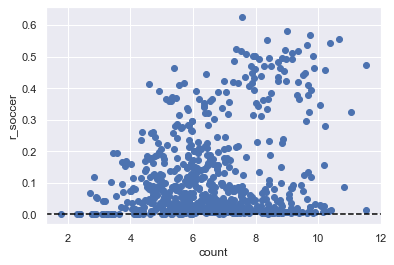

In [519]:
#check soccer counts againts ln(count). Should soccer be normalized or no?
plt.scatter(data['ln_count'], data['r_soccer_norm'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('count')
plt.ylabel('r_soccer') 

#### 3. Mixed Model

703

#### checkpoint save

In [524]:
model_df

,Unnamed: 0,subreddit,tops,top1,top2,pop1,pop2,top_string2,distance,ln_pop1,ln_pop2,ln_distance
0,0,reddit.com,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405
1,1,reddit.com,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405
2,2,it,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405
3,3,AskReddit,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405
4,4,AskReddit,"['Milan', 'Naples']",Milan,Naples,3698,2308,MilanNaples,6.582928e+05,8.215547,7.744137,13.397405
...,...,...,...,...,...,...,...,...,...,...,...,...
2128596,2128596,soccer,"['Barcelona', 'Madrid']",Barcelona,Madrid,3659,4955,BarcelonaMadrid,5.069220e+05,8.204945,8.508152,13.136112
2128597,2128597,sportsbook,"['Lisboa', 'Madrid']",Lisbon,Madrid,2315,4955,LisbonMadrid,5.038610e+05,7.747165,8.508152,13.130056
2128598,2128598,reddevils,"['London', 'Manchester']",London,Manchester,8256,2207,LondonManchester,2.623567e+05,9.018695,7.699389,12.477460
2128599,2128599,europe,"['Athens', 'Lisboa']",Athens,Lisbon,3331,2315,AthensLisbon,2.858622e+06,8.111028,7.747165,14.865850


### load topstrings with zero counts. Run gravity model with zero counts included

In [584]:
top_string2 = []
top1 = []
top2 = []
for j in combinations(city_variation_df['eng'], 2):
    top = list(j)
    top.sort()
    top1.append(top[0])
    top2.append(top[1])
    top_string2.append(top[0]+top[1])

zero_top_df = pd.DataFrame()
zero_top_df['top_string2'] = top_string2 
zero_top_df['top1'] = top1
zero_top_df['top2'] = top2
zero_top_df

,top_string2,top1,top2
0,LondonParis,London,Paris
1,MadridParis,Madrid,Paris
2,BerlinParis,Berlin,Paris
3,MilanParis,Milan,Paris
4,BarcelonaParis,Barcelona,Paris
...,...,...,...
736,HelsinkiRotterdam,Helsinki,Rotterdam
737,DüsseldorfHelsinki,Düsseldorf,Helsinki
738,AmsterdamRotterdam,Amsterdam,Rotterdam
739,AmsterdamDüsseldorf,Amsterdam,Düsseldorf


In [662]:
model_tops = list(model_df['top_string2'].unique())

In [574]:
float(dist_df[dist_df['top_string2']==[i for i in top_string2 if i not in model_tops][2]]['Distance'])

1447275.17328822

In [695]:
zero_counts = [i for i in top_string2 if i not in model_tops]
distances = [float(dist_df[dist_df['top_string2']==i]['Distance']) for i in zero_counts]
zero_df = pd.DataFrame()
zero_df['top_string2'] = zero_counts
zero_df['distance'] = distances

top1 = []
top2 = []
for i, row in zero_df.iterrows():
    key = row['top_string2']
    top1.append(str(zero_top_df[zero_top_df['top_string2']==key]['top1']).split('    ')[1].split('\n')[0])
    top2.append(str(zero_top_df[zero_top_df['top_string2']==key]['top2']).split('    ')[1].split('\n')[0])


In [696]:
zero_df['top1'] = top1
zero_df['top2'] = top2

In [697]:
mapping = {}
for i, row in pop_df.iterrows():
    mapping[row['eng']] = row['pop']

zero_df['pop1'] = zero_df['top1']
zero_df = zero_df.replace({"pop1": mapping})
zero_df['pop2'] = zero_df['top2']
zero_df = zero_df.replace({"pop2": mapping})

In [698]:
zero_df['ln_distance'] = zero_df['distance'].apply(lambda x: math.log(x))
zero_df['ln_pop1'] = zero_df['pop1'].apply(lambda x: math.log(x))
zero_df['ln_pop2'] = zero_df['pop2'].apply(lambda x: math.log(x))

In [699]:
X2 = zero_df[['top_string2', 'ln_pop1', 'ln_pop2', 'ln_distance']]
X2['count'] = 0
X2

C:\Users\kodri\AppData\Local\Temp\ipykernel_37580\905868740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['count'] = 0


,top_string2,ln_pop1,ln_pop2,ln_distance,count
0,Frankfurt am MainParis,7.287561,9.168580,13.084403,0
1,Frankfurt am MainLondon,7.287561,9.018695,13.368697,0
2,Frankfurt am MainMadrid,7.287561,8.508152,14.185193,0
3,BerlinFrankfurt am Main,8.236421,7.287561,12.956005,0
4,Frankfurt am MainMilan,7.287561,8.215547,13.157760,0
5,BarcelonaFrankfurt am Main,8.204945,7.287561,13.904586,0
6,AthensFrankfurt am Main,8.111028,7.287561,14.404044,0
7,Frankfurt am MainRome,7.287561,7.836765,13.773968,0
8,BirminghamFrankfurt am Main,7.767687,7.287561,13.570956,0
9,Frankfurt am MainLisbon,7.287561,7.747165,14.454044,0


In [672]:
X.groupby('top_string2').mean()

,ln_pop1,ln_pop2,ln_distance,count
top_string2,,,,
AmsterdamAthens,6.958448,8.111028,14.588456,1.0
AmsterdamBarcelona,6.958448,8.204945,14.029741,1.0
AmsterdamBerlin,6.958448,8.236421,13.266508,1.0
AmsterdamBirmingham,6.958448,7.767687,13.043953,1.0
AmsterdamBrussels,6.958448,7.311886,12.066258,1.0
...,...,...,...,...
TurinVienna,7.177019,7.422971,13.528876,1.0
TurinWarsaw,7.177019,7.602900,14.047376,1.0
ValenciaVienna,7.183871,7.422971,14.319053,1.0


In [653]:
x.to_csv('delete.csv')

In [688]:
model = pd.concat([X, X2])
x = model.groupby('top_string2').mean()[['ln_pop1', 'ln_pop2','ln_distance']]
Y = model[['top_string2', 'count']].groupby('top_string2').sum()
Y

,count
top_string2,
AmsterdamFrankfurt am Main,0.0
AthensFrankfurt am Main,0.0
BarcelonaFrankfurt am Main,0.0
BerlinFrankfurt am Main,0.0
BirminghamFrankfurt am Main,0.0
BrusselsFrankfurt am Main,0.0
BucharestFrankfurt am Main,0.0
BudapestFrankfurt am Main,0.0
CologneFrankfurt am Main,0.0


In [652]:
x = sm.add_constant(x)
model = sm.OLS(Y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     65.36
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.75e-37
Time:                        17:16:25   Log-Likelihood:                -7587.9
No. Observations:                 741   AIC:                         1.518e+04
Df Residuals:                     737   BIC:                         1.520e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.97e+04   6783.880     -2.904      

In [709]:
zero_df

,top_string2,distance,top1,top2,pop1,pop2,ln_distance,ln_pop1,ln_pop2
0,Frankfurt am MainParis,4.813756e+05,Frankfurt am Main,Paris,1462,9591,13.084403,7.287561,9.168580
1,Frankfurt am MainLondon,6.396631e+05,Frankfurt am Main,London,1462,8256,13.368697,7.287561,9.018695
2,Frankfurt am MainMadrid,1.447275e+06,Frankfurt am Main,Madrid,1462,4955,14.185193,7.287561,8.508152
3,BerlinFrankfurt am Main,4.233715e+05,Berlin,Frankfurt am Main,3776,1462,12.956005,8.236421,7.287561
4,Frankfurt am MainMilan,5.180152e+05,Frankfurt am Main,Milan,1462,3698,13.157760,7.287561,8.215547
5,BarcelonaFrankfurt am Main,1.093164e+06,Barcelona,Frankfurt am Main,3659,1462,13.904586,8.204945,7.287561
6,AthensFrankfurt am Main,1.801345e+06,Athens,Frankfurt am Main,3331,1462,14.404044,8.111028,7.287561
7,Frankfurt am MainRome,9.593088e+05,Frankfurt am Main,Rome,1462,2532,13.773968,7.287561,7.836765
8,BirminghamFrankfurt am Main,7.830534e+05,Birmingham,Frankfurt am Main,2363,1462,13.570956,7.767687,7.287561
9,Frankfurt am MainLisbon,1.893702e+06,Frankfurt am Main,Lisbon,1462,2315,14.454044,7.287561,7.747165


In [679]:
x = X.groupby('top_string2').mean()[['ln_pop1', 'ln_pop2', 'ln_distance']]
Y = X.groupby('top_string2').sum()[['count']]
x = sm.add_constant(x)
model = sm.OLS(Y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     65.91
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.54e-37
Time:                        18:25:46   Log-Likelihood:                -7209.9
No. Observations:                 703   AIC:                         1.443e+04
Df Residuals:                     699   BIC:                         1.445e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.674e+04   7115.999     -2.353      

In [726]:
sample_df = pd.read_csv('gravity_MODEL1.csv')
sample_df['ln_count'] = sample_df['count'].apply(lambda x: math.log(x))                         
Y = sample_df['ln_count']

## Linear regression EDA

In [773]:
X = sample_df[sample_df.columns[:13]].groupby('top_string').mean()
X['r_soccer_norm'] = soccer

<AxesSubplot:>

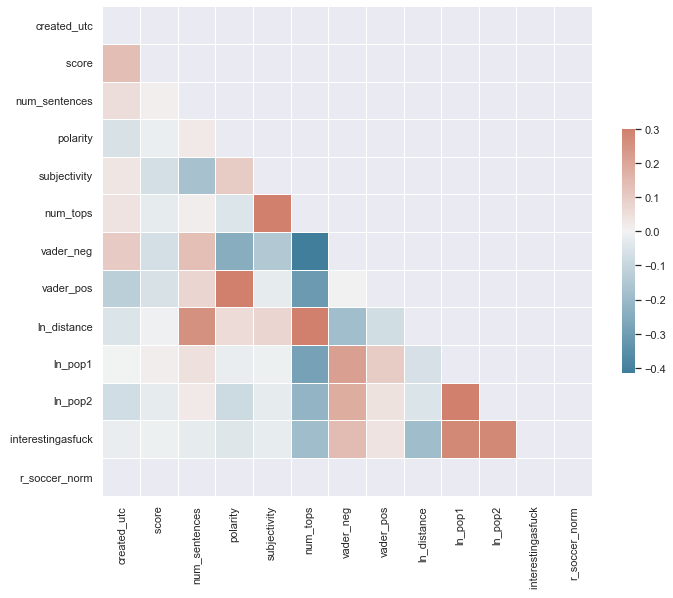

In [774]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [750]:
cols = [' score', 'polarity', 'subjectivity',
       'num_tops', 'vader_neg','vader_pos', 'ln_distance',
       'ln_pop2']

In [749]:
X

,created_utc,score,num_sentences,polarity,subjectivity,num_tops,vader_neg,vader_pos,ln_distance,ln_pop1,ln_pop2,ln_count
top_string,,,,,,,,,,,,
Amsterdam_Düsseldorf,1.532835e+09,3.947368,8.105263,0.050384,0.379290,4.421053,0.038579,0.063579,12.112322,6.958448,6.923629,NaN
Amsterdam_Rotterdam,1.518439e+09,4.833713,7.045558,0.137960,0.439015,2.353075,0.039565,0.106870,10.958397,6.958448,6.932448,NaN
Athens_Amsterdam,1.517615e+09,24.396226,10.245283,0.113617,0.437986,6.320755,0.040679,0.098981,14.588456,8.111028,6.958448,NaN
Athens_Birmingham,1.499817e+09,5.000000,7.400000,0.175411,0.428223,2.300000,0.037800,0.089500,14.753286,8.111028,7.767687,NaN
Athens_Brussels,1.507615e+09,5.687500,20.375000,0.113022,0.416071,6.687500,0.052344,0.081062,14.553392,8.111028,7.311886,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Warsaw_Stockholm,1.513146e+09,10.187500,7.718750,0.118812,0.467688,7.093750,0.042906,0.064187,13.605688,7.602900,7.299121,NaN
Warsaw_Stuttgart,1.496874e+09,1.000000,3.000000,0.018371,0.400000,2.000000,0.081000,0.000000,13.733585,7.602900,7.458763,NaN
Warsaw_Torino,1.507831e+09,9.333333,1.333333,0.058333,0.183333,6.666667,0.047333,0.000000,14.047376,7.602900,7.177019,NaN


In [771]:
X

,const,ln_pop1,ln_pop2,ln_distance,r_soccer_norm
top_string2,,,,,
AmsterdamAthens,1.0,6.958448,8.111028,14.588456,0.015499
AmsterdamBarcelona,1.0,6.958448,8.204945,14.029741,0.033509
AmsterdamBerlin,1.0,6.958448,8.236421,13.266508,0.006700
AmsterdamBirmingham,1.0,6.958448,7.767687,13.043953,0.024779
AmsterdamBrussels,1.0,6.958448,7.311886,12.066258,0.008364
...,...,...,...,...,...
TurinVienna,1.0,7.177019,7.422971,13.528876,0.077586
TurinWarsaw,1.0,7.177019,7.602900,14.047376,0.236842
ValenciaVienna,1.0,7.183871,7.422971,14.319053,0.212465


 score
polarity
subjectivity
num_tops
vader_neg
vader_pos
ln_distance
ln_pop2


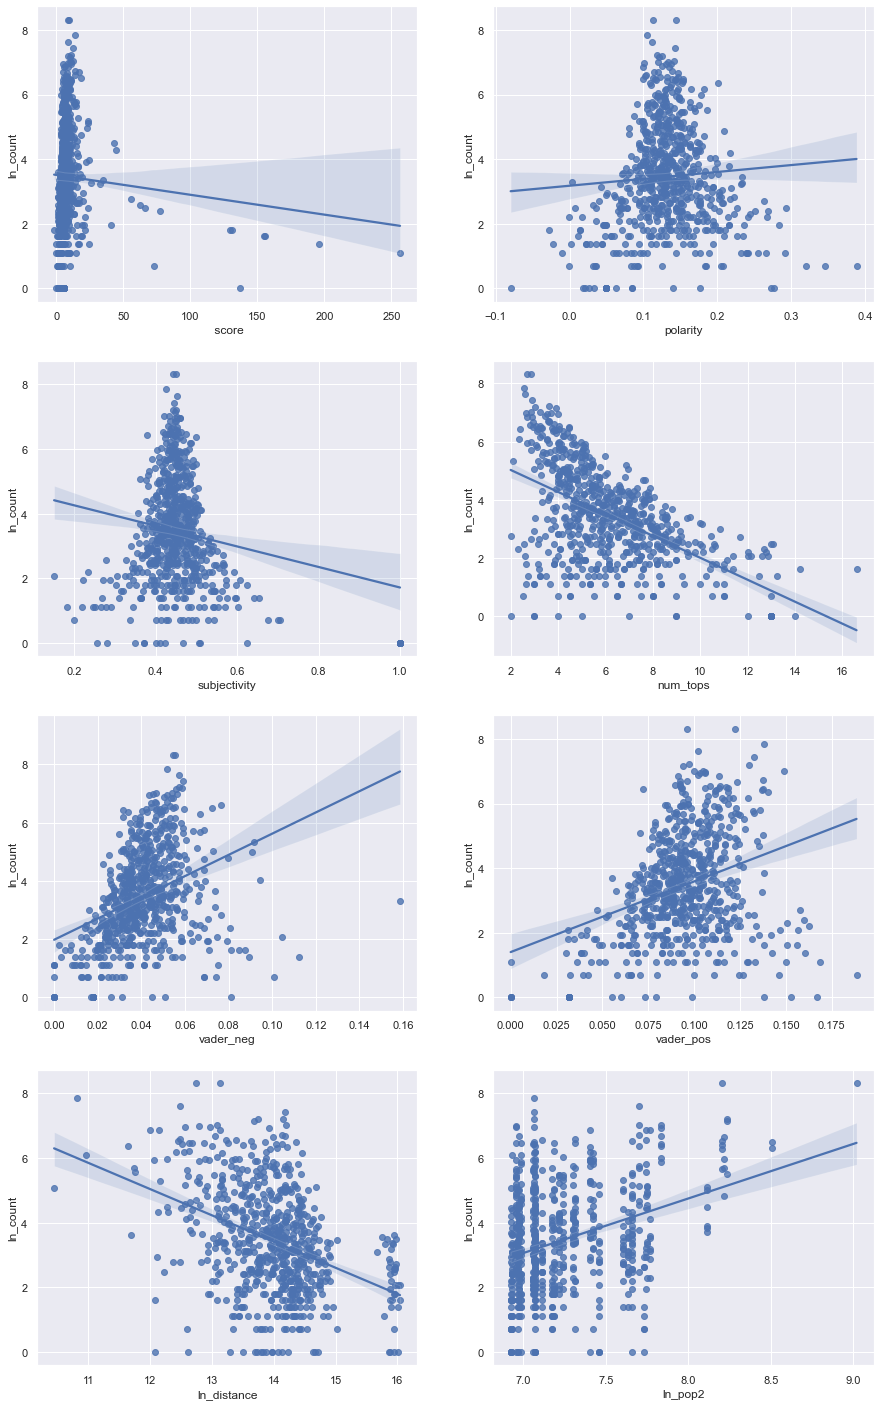

In [751]:
corr_df = X.reset_index()
corr_df['ln_count'] = Y

fig, axs = plt.subplots(ncols=2, nrows =4)
fig.set_figheight(25)
fig.set_figwidth(15)
first = 0
second = 0
for i in cols:
    print(i)
    sns.regplot(data=corr_df, x=i, y="ln_count", ax=axs[first,second])
    if second == 1:
        second = 0
        first+=1
        continue
    second+=1

In [548]:
export = pd.concat([model_df[['tops','ln_pop1', 'ln_pop2', 'ln_distance']].groupby('tops').mean().head(), delete['ln_counts'] ], axis = 1)
import dataframe_image as dfi
dfi.export(export, 'images\\gravity_table.png')

In [520]:
model_df = pd.read_csv('corpus_gravity_df.csv')

In [241]:
model_df.to_csv('corpus_gravity_df.csv')